In [26]:
%pip install tensorflow
%pip install numpy
%pip install matplotlib
%pip install kagglehub
%pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 7.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 40.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
# import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("umairshahpirzada/birds-20-species-image-classification")

print("Path to dataset files:", path)

/Users/clairtonluz/projects/personal/MBA-em-ciencia-de-dados/Deep Leaning/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 69.3M/69.3M [00:03<00:00, 23.7MB/s]

Extracting files...


Path to dataset files: /Users/clairtonluz/.cache/kagglehub/datasets/umairshahpirzada/birds-20-species-image-classification/versions/1


In [8]:
train_ds = os.path.join(path, "train")
test_ds = os.path.join(path, "test")
validation_ds = os.path.join(path, "valid")

In [9]:
os.listdir(train_ds)

['AFRICAN EMERALD CUCKOO',
 'AMERICAN COOT',
 'AFRICAN PYGMY GOOSE',
 'ABBOTTS BABBLER',
 'ALBERTS TOWHEE',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN FLAMINGO',
 'AMERICAN AVOCET',
 'AFRICAN PIED HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AFRICAN OYSTER CATCHER',
 'ALPINE CHOUGH',
 'AMERICAN BITTERN',
 'ABYSSINIAN GROUND HORNBILL',
 'ALBATROSS',
 'ABBOTTS BOOBY',
 'AFRICAN FIREFINCH',
 'ALEXANDRINE PARAKEET']

## Inicializa generators

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(train_ds, target_size=(150, 150), batch_size=32, class_mode='categorical')
validation_generator = valid_datagen.flow_from_directory(validation_ds, target_size=(150, 150), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_ds, target_size=(150, 150), batch_size=32, class_mode='categorical')

Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [18]:
test_generator[0][0].shape

(32, 150, 150, 3)

In [19]:
validation_generator[0][0].shape

(32, 150, 150, 3)

In [20]:
train_generator[0][0].shape

(32, 150, 150, 3)

In [21]:
img = train_generator[0]
print(img)

(array([[[[0.8745099 , 0.8941177 , 0.9176471 ],
         [0.8745099 , 0.8941177 , 0.9176471 ],
         [0.8745099 , 0.8941177 , 0.9176471 ],
         ...,
         [0.8705883 , 0.882353  , 0.9176471 ],
         [0.86274517, 0.8745099 , 0.909804  ],
         [0.8470589 , 0.8588236 , 0.8941177 ]],

        [[0.8745099 , 0.8941177 , 0.9176471 ],
         [0.8745099 , 0.89019614, 0.92549026],
         [0.8745099 , 0.89019614, 0.92549026],
         ...,
         [0.8862746 , 0.8980393 , 0.9333334 ],
         [0.8862746 , 0.8980393 , 0.9333334 ],
         [0.87843144, 0.89019614, 0.92549026]],

        [[0.8745099 , 0.8941177 , 0.9176471 ],
         [0.8745099 , 0.89019614, 0.92549026],
         [0.8745099 , 0.89019614, 0.92549026],
         ...,
         [0.882353  , 0.8941177 , 0.9294118 ],
         [0.882353  , 0.8941177 , 0.9294118 ],
         [0.8745099 , 0.8862746 , 0.9215687 ]],

        ...,

        [[0.2901961 , 0.28235295, 0.23137257],
         [0.2509804 , 0.24313727, 0.19215688

In [22]:
print(len(train_generator))
print(len(test_ds))
print(len(validation_ds))

101
115
116


In [23]:
type(train_generator)

keras.src.legacy.preprocessing.image.DirectoryIterator

# Exemplos de imagens usadas no treino

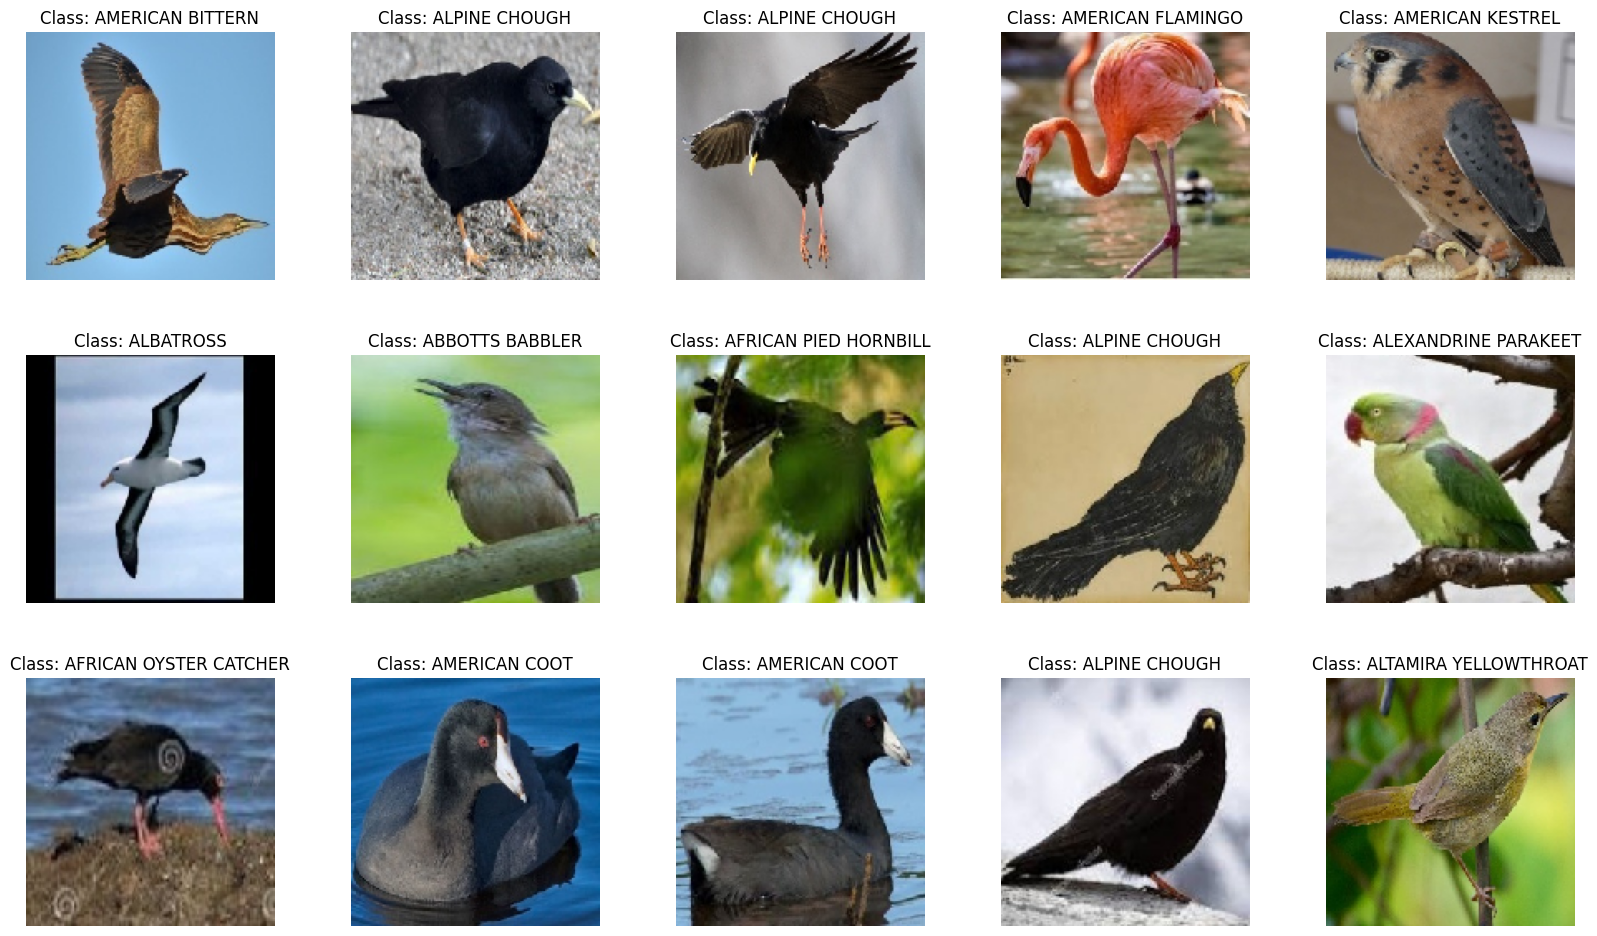

In [24]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")


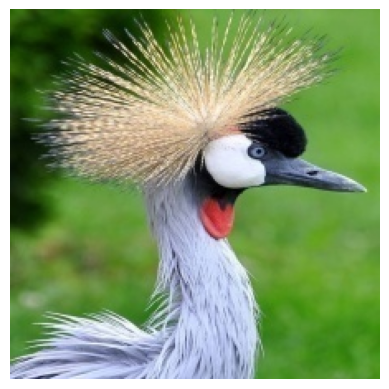

In [27]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = os.path.join(path, "images to predict/4.jpg")
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Build the Sequential feedforward neural network model
seq_model = Sequential([ 
    Flatten(input_shape=(150,150,3), name='input_layer'),
    Dense(128, activation='relu', name='layer1'),
    Dense(64, activation='relu', name='layer2'),
    Dense(32, activation='relu', name='layer3'),
    Dense(20, activation='softmax', name='output_layer')
])

In [31]:
seq_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Flatten)           │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 128)            │     8,640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 20)             │           660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,651,124 (33.00 MB)

 Trainable params: 8,651,124 (33.00 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.optimizers import Adam

seq_model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [33]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 150, 150, 3)
(32, 20)


In [ ]:
history = seq_model.fit(train_generator,
                    epochs=5,
                    validation_data=validation_generator,
                   )

Epoch 1/5


/Users/clairtonluz/projects/personal/MBA-em-ciencia-de-dados/Deep Leaning/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.0629 - loss: 3.1154 - val_accuracy: 0.0800 - val_loss: 2.9209
Epoch 2/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.1129 - loss: 2.8452 - val_accuracy: 0.1000 - val_loss: 2.7768
Epoch 3/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.1540 - loss: 2.7184 - val_accuracy: 0.1900 - val_loss: 2.6333
Epoch 4/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.2285 - loss: 2.5889 - val_accuracy: 0.2700 - val_loss: 2.5414
Epoch 5/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.2347 - loss: 2.5025 - val_accuracy: 0.2800 - val_loss: 2.4450


In [36]:
n_categories = len(os.listdir(train_ds))# number of categories
print(n_categories)

20


In [43]:
results = pd.DataFrame(history.history)
results.tail()

,accuracy,loss,val_accuracy,val_loss
0,0.079177,2.986924,0.08,2.920890
1,0.110037,2.831872,0.10,2.776837
2,0.172070,2.692068,0.19,2.633254
3,0.224439,2.579804,0.27,2.541423
4,0.249065,2.467326,0.28,2.445044


In [44]:
results.head()

,accuracy,loss,val_accuracy,val_loss
0,0.079177,2.986924,0.08,2.920890
1,0.110037,2.831872,0.10,2.776837
2,0.172070,2.692068,0.19,2.633254
3,0.224439,2.579804,0.27,2.541423
4,0.249065,2.467326,0.28,2.445044


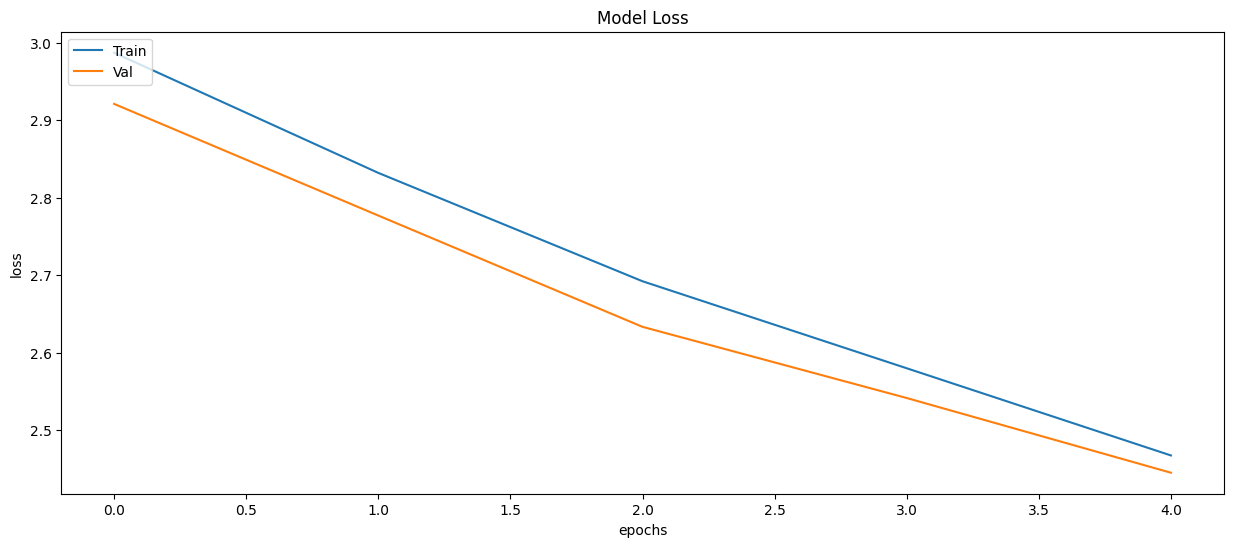

In [45]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

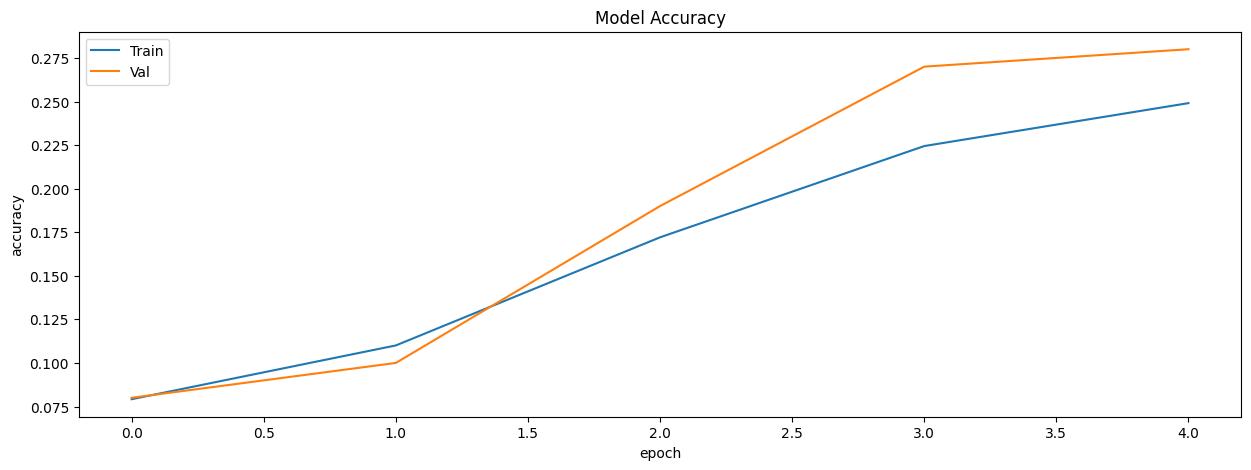

In [46]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [95]:
history = seq_model.fit(train_generator,
                    epochs=60,
                    validation_data=validation_generator,
                    
                   )

Epoch 1/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.7584 - loss: 0.8119 - val_accuracy: 0.4600 - val_loss: 1.7829
Epoch 2/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7819 - loss: 0.7817 - val_accuracy: 0.5100 - val_loss: 1.7543
Epoch 3/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7923 - loss: 0.7339 - val_accuracy: 0.4900 - val_loss: 1.8510
Epoch 4/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7749 - loss: 0.7798 - val_accuracy: 0.5300 - val_loss: 1.7298
Epoch 5/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8056 - loss: 0.7198 - val_accuracy: 0.5100 - val_loss: 1.7154
Epoch 6/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7896 - loss: 0.7430 - val_accuracy: 0.4800 - val_loss: 1.8838
Epoch 7/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7921 - loss: 0.7345 - val_accuracy: 0.4900 - val_loss: 1.7554
Epoch 8/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8263 - loss: 0.6467 - val_accu

In [96]:
y_test_1 = test_generator.classes
y_pred_1 =seq_model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [97]:
results = seq_model.evaluate(test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5584 - loss: 1.8120


In [99]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1,y_pred_1,target_names = labels))

ValueError: Number of classes, 20, does not match size of target_names, 25. Try specifying the labels parameter

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


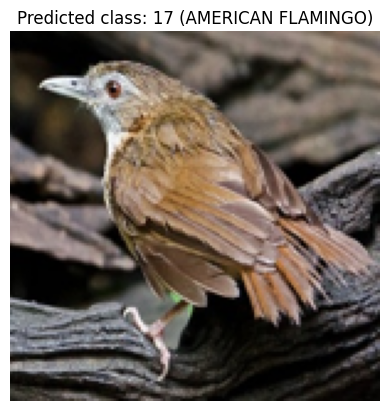

In [ ]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = os.path.join(path, "test/ABBOTTS BABBLER")
img_size = 150

images = [] 
for filename in os.listdir(image_directory):
    img = Image.open(os.path.join(image_directory, filename))
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions =seq_model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label) + ' (' + labels[class_label] + ')')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


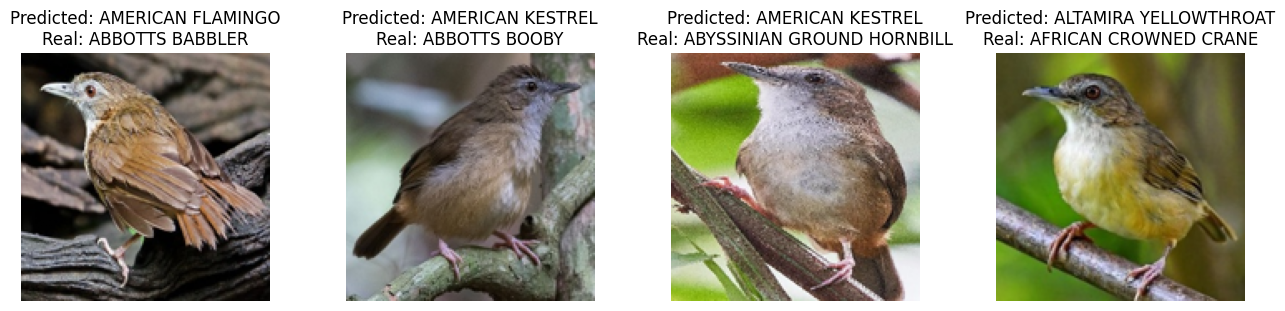

In [94]:

image_directory = os.path.join(path, "test/ABBOTTS BABBLER")
# image_directory = os.path.join(path, "test")
img_size = 150

images = []
labels = [k for k in train_generator.class_indices]
# for label in os.listdir(image_directory):
#     for filename in os.listdir(os.path.join(image_directory, label)):
        # img = Image.open(os.path.join(image_directory, label, filename))
for filename in os.listdir(image_directory):
    img = Image.open(os.path.join(image_directory, filename))
    img = img.resize((img_size, img_size))
    images.append(img)
    labels.append(label)
        
images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = seq_model.predict(images)

plt.figure(figsize=(20, 20))
for i in range(len(images) -1):
    # print(i)
    plt.subplot(5, 5, i + 1)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title('Predicted: ' + labels[np.argmax(predictions[i])] + '\nReal: ' + labels[i])
plt.show()

In [ ]:
labels

20

In [62]:
train_generator.class_indices

labels[class_label]


'AMERICAN FLAMINGO'